In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# check gpu
print(tf.config.list_physical_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


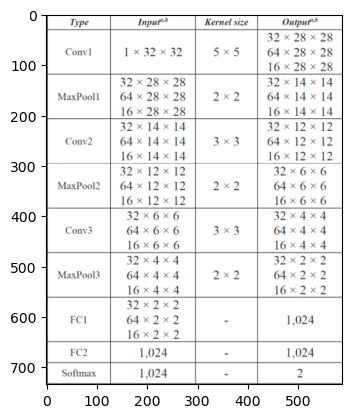

In [3]:
# https://ieeexplore.ieee.org/abstract/document/7440527
# we have changed our model
img = mpimg.imread('possible_model.png')
plt.imshow(img)
plt.show()

In [28]:
input_shape = (225, 225, 1)

model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=input_shape),
    # convolution 1:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 1:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # convolution 2:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 2:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # convolution 3:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 3:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [30]:
training_array_RAW = np.load('training_array_RAW.npy')
training_labels_array = np.load('training_labels_array.npy')
validation_array_RAW = np.load('validation_array_RAW.npy')
validation_labels_array = np.load('validation_labels_array.npy')

print(training_array_RAW.shape)

(3180, 225, 225)


In [31]:
hist = model.fit(training_array_RAW, training_labels_array,
              epochs=30,
              batch_size=32,
              validation_data=(validation_array_RAW, validation_labels_array))

Epoch 1/30
100/100 [==============================] - 8s 70ms/step - loss: 0.3044 - accuracy: 0.9336 - val_loss: 0.6456 - val_accuracy: 0.8059
Epoch 2/30
  1/100 [..............................] - ETA: 5s - loss: 0.5368 - accuracy: 0.8438

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\asyncio\windows_events.py", line 321, in run_forever
      super().run_forever()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Kevin\AppData\Local\Temp\ipykernel_6032\3913420416.py", line 1, in <module>
      hist = model.fit(training_array_RAW, training_labels_array,
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\Kevin\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,32,225,225] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1479]

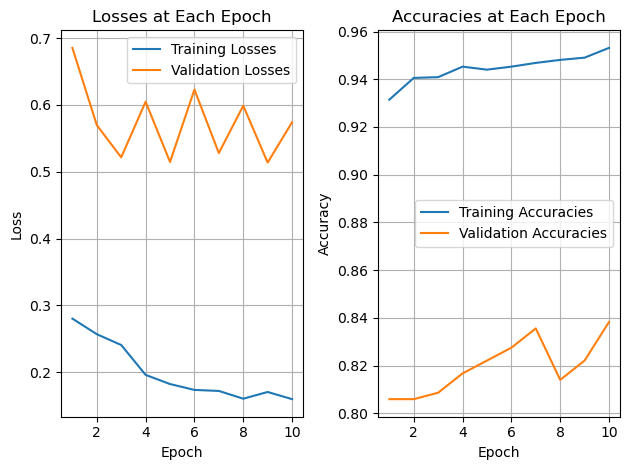

In [74]:
# TODO

# losses
plt.subplot(1,2,1)
plt.plot(np.arange(1,11,1), hist.history.get('loss'), label="Training Losses")
plt.plot(np.arange(1,11,1), hist.history.get('val_loss'), label="Validation Losses")
plt.grid(visible=True)
plt.title("Losses at Each Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

# accuracies
plt.subplot(1,2,2)
plt.plot(np.arange(1,11,1), hist.history.get('accuracy'), label="Training Accuracies")
plt.plot(np.arange(1,11,1), hist.history.get('val_accuracy'), label="Validation Accuracies")
plt.grid(visible=True)
plt.title("Accuracies at Each Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

# show plots
plt.tight_layout()
plt.show()